In [80]:
import os
import time

from importlib import reload

import pandas as pd

import numpy as np
from scipy.stats import norm as norm_dist

from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt



In [9]:
def get_rmse(y_actual, y_pred):
    return sqrt(mean_squared_error(y_actual, y_pred))

### Reading in the prediction file of all input models

In [20]:
all_pred = pd.read_csv("CA_2010_2016/CA_predictions_2010_2016_AV_GBD_CMAQ.csv")

In [21]:
all_pred.head()

,lon,lat,pred_AV,time,pred_GS,pred_CM
0,-124.195,42.005,3.5,2010,4.944805,5.367877
1,-124.185,42.005,3.5,2010,4.944805,5.367877
2,-124.175,42.005,3.5,2010,4.944805,5.367877
3,-124.165,42.005,3.5,2010,4.944805,5.367877
4,-124.155,42.005,3.5,2010,4.944805,5.367877


In [23]:
all_pred.time.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016])

### Reading in the ensemble predictions

In [30]:
ensemble_pred = pd.read_csv("CA_2010_2016/CA_2010_2016_ensemble_pred.csv")

In [31]:
ensemble_pred.shape

(5060384, 5)

In [32]:
all_pred.shape

(5060384, 6)

In [143]:
ensemble_pred_s = ensemble_pred.sort_values(['lon', 'lat', 'time'])[['lon', 'lat', 'time', 'bne_pred']]

In [144]:
ensemble_pred_s.lon = round(ensemble_pred_s.lon, 3)
ensemble_pred_s.lat = round(ensemble_pred_s.lat, 3)

In [145]:
all_pred_s = all_pred.sort_values(['lon', 'lat', 'time']).reset_index()

In [114]:
np.array_equal(all_pred_s.lat,ensemble_pred_s.lat)

True

In [115]:
ensemble_pred_s.head()

,lon,lat,time,bne_pred
0,-124.395,40.415,2010.0,5.059226
1,-124.395,40.415,2011.0,5.614775
2,-124.395,40.415,2012.0,5.347132
3,-124.395,40.415,2013.0,5.341567
4,-124.395,40.415,2014.0,5.784965


In [139]:
all_pred_s.head()

,index,lon,lat,pred_AV,time,pred_GS,pred_CM
0,159409,-124.395,40.415,4.8,2010,5.165063,5.265068
1,882321,-124.395,40.415,5.9,2011,5.287860,5.708282
2,1605233,-124.395,40.415,5.8,2012,5.396921,4.811139
3,2328145,-124.395,40.415,4.7,2013,5.338242,5.955225
4,3051057,-124.395,40.415,4.3,2014,5.178400,7.275833


In [116]:
preds = all_pred_s.copy()

### Combining the above two files

In [118]:
preds['pred_bne'] = ensemble_pred_s['bne_pred']

In [122]:
preds = preds.drop(['index'], axis=1)

In [138]:
preds.head()

,lon,lat,pred_AV,time,pred_GS,pred_CM,pred_bne
0,-124.395,40.415,4.8,2010,5.165063,5.265068,5.059226
1,-124.395,40.415,5.9,2011,5.287860,5.708282,5.614775
2,-124.395,40.415,5.8,2012,5.396921,4.811139,5.347132
3,-124.395,40.415,4.7,2013,5.338242,5.955225,5.341567
4,-124.395,40.415,4.3,2014,5.178400,7.275833,5.784965


In [123]:
preds.to_csv("CA_2010_2016/CA_predictions_2010_2016_AV_GBD_CMAQ_bne.csv")

### Do the mapping to monitors in R

### Reading in the new train_bne file with the bne prediction

In [124]:
train_bne = pd.read_csv("CA_2010_2016/CA_training_bne_2010_2016.csv")

In [125]:
clean_train_bne = train_bne[~train_bne.pred_bne.isnull()]

In [126]:
clean_train_bne.shape

(599, 9)

In [127]:
clean_train_bne.head()

,Unnamed: 0,time,lon,lat,pm25_obs,pred_AV,pred_GS,pred_CM,pred_bne
0,1,2010,-124.083900,41.560800,2.835678,3.4,5.364638,5.233236,2.914824
1,2,2010,-122.922290,39.032700,3.075410,4.4,4.792302,5.096038,4.014852
3,4,2010,-122.804600,40.786400,2.069659,3.9,5.172780,4.972227,4.158982
4,5,2010,-122.633579,41.726892,4.501818,3.5,6.890557,5.695310,3.801347
5,6,2010,-122.403100,40.630400,6.252542,8.0,4.764040,6.590685,7.443696


In [128]:
clean_train_bne.describe()

,Unnamed: 0,time,lon,lat,pm25_obs,pred_AV,pred_GS,pred_CM,pred_bne
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,311.714524,2013.053422,-119.032130,36.438751,8.003746,9.372621,9.112300,8.740908,8.638786
std,179.344226,2.002628,2.237591,2.663299,3.800564,3.611347,2.826370,2.609005,2.830240
min,1.000000,2010.000000,-124.179490,32.631231,0.001505,3.000000,4.405891,3.637177,2.533623
25%,155.500000,2011.000000,-120.994212,34.069570,4.760028,6.400000,7.077996,6.786556,6.627696
50%,312.000000,2013.000000,-118.870509,36.141875,7.700000,8.700000,8.550010,8.270886,8.093032
75%,466.500000,2015.000000,-117.325540,38.935680,10.542489,12.250000,10.764304,10.331870,10.565711
max,621.000000,2016.000000,-114.216100,41.892600,22.301695,19.500000,18.899250,16.326068,17.229015


### Calculating all RMSE!!

In [129]:
get_rmse(clean_train_bne['pm25_obs'], clean_train_bne['pred_AV'])

2.7789671527648983

In [130]:
get_rmse(clean_train_bne['pm25_obs'], clean_train_bne['pred_GS'])

2.5739644640109174

In [131]:
get_rmse(clean_train_bne['pm25_obs'], clean_train_bne['pred_CM'])

2.259299247761252

In [132]:
bne_rmse = get_rmse(clean_train_bne['pm25_obs'], clean_train_bne['pred_bne'])

In [133]:
bne_rmse

1.9169924573015333

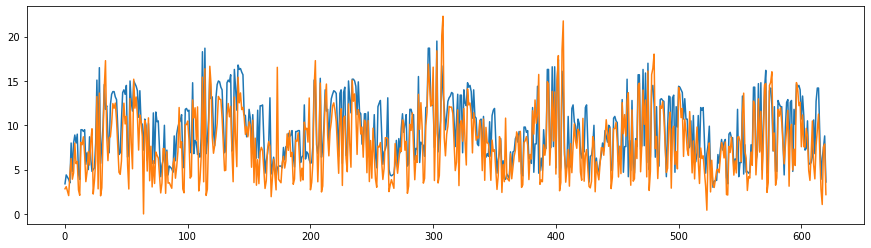

In [134]:
plt.figure(figsize=[15, 4])
plt.plot(clean_train_bne.pred_AV)
plt.plot(clean_train_bne.pm25_obs)


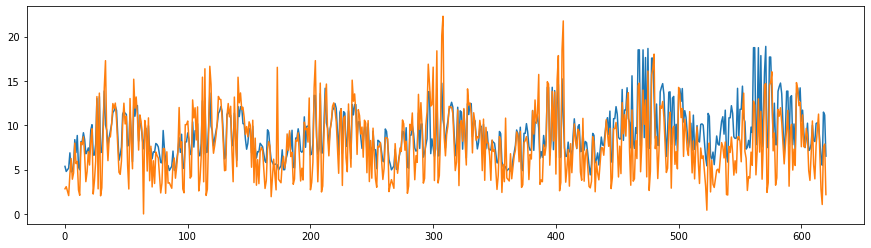

In [135]:
plt.figure(figsize=[15, 4])
plt.plot(clean_train_bne.pred_GS)
plt.plot(clean_train_bne.pm25_obs)


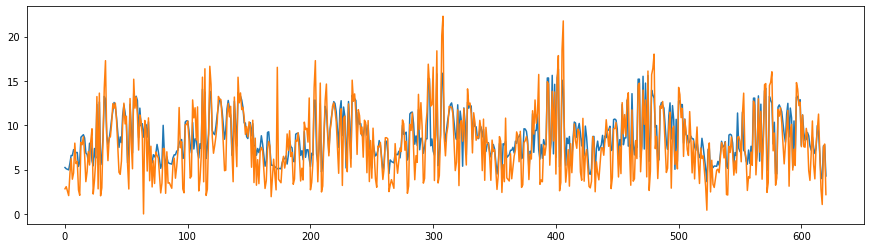

In [136]:
plt.figure(figsize=[15, 4])
plt.plot(clean_train_bne.pred_CM)
plt.plot(clean_train_bne.pm25_obs)


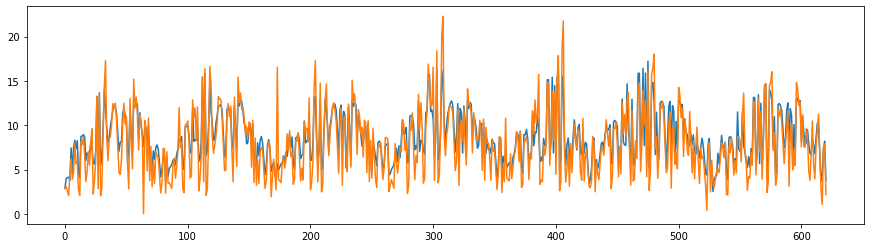

In [137]:
plt.figure(figsize=[15, 4])
plt.plot(clean_train_bne.pred_bne)
plt.plot(clean_train_bne.pm25_obs)